### t-값

$$ t=\frac{\hat{\mu}-\mu}{\frac{\hat{\sigma}}{\sqrt{N}}} $$

$$ t= \frac{표본평균-모평균}{표준오차} $$

- 표준화를 했지만 분산의 값이 1이 안됨 ($$ Z=\frac{X-\mu}{\sigma} $$)
- 분산이 (표본평균의) 모분산이 아니고 표본분산이기 때문

### t-값의 표본분포 (t-분포)

예.

1. $$N(x|\mu=4,\sigma=0.8)$$인 모집단에서 표본추출 시뮬레이션을 함. 샘플사이즈 10
2. 얻은 표본의 표본평균을 구함
3. 얻은 표본에서 표준오차를 구함. 
4. t-값 계산
5. 이를 10000번 반복 해서 t-값들 집합 완성 


### t-분포의 성질

- 평균은 0
- 분산값: n이 자유도 (N-1) 
$$ t(n)의 분산 = \frac{n}{n-2} $$


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline

In [4]:
sample_size = 10
sample = np.random.normal(loc=4, scale=0.8, size=sample_size)
hat_x = sample.mean()
hat_std = sample.std(ddof=1)
t_val = (hat_x - 4) / (hat_std / np.sqrt(sample_size))
print('t value: %.3f' % t_val)

t value: 0.225


In [5]:
sample_size = 100
t_val = np.zeros(10000)
for i in range(10000):
    sample = np.random.normal(loc=4, scale=0.8, size=sample_size)
    hat_x = sample.mean()
    hat_std = sample.std(ddof=1)
    t_val[i] = (hat_x - 4) / (hat_std / np.sqrt(sample_size))
t_val

array([-0.451,  2.557,  1.389, ..., -0.949, -1.196, -0.509])

/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


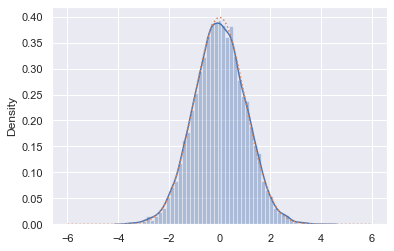

In [6]:
sns.distplot(t_val)
x = np.arange(-6, 6.1, 0.1)
plt.plot(x, stats.norm.pdf(x), linestyle='dotted')
plt.xlim = (-6, 6)